In [1]:
import os
path = os.getcwd()

1、导入数据

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use({'figure.figsize' : (12, 8)})
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号

import warnings
warnings.filterwarnings('ignore')

In [89]:
data_train = pd.read_csv(path + '/data/train.csv')
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2、探索数据：分析各项特征与目标变量“房屋售价”(SalePrice)间的关系

峰度: 1.882876
偏度: 6.536282


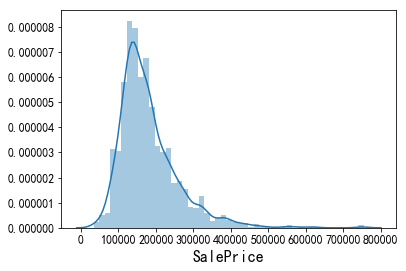

In [5]:
# 设置刻度字体大小  
plt.xticks(fontsize = 12)  
plt.yticks(fontsize = 12)
plt.xlabel('SalePrice', fontsize = 16)  

sns.distplot(data_train['SalePrice'])
print('峰度: %f' % data_train['SalePrice'].skew())
print('偏度: %f' % data_train['SalePrice'].kurt())

CentralAir                   N             Y
SalePrice count      95.000000    1365.00000
          mean   105264.073684  186186.70989
          std     40671.273961   78805.20682
          min     34900.000000   52000.00000
          25%     82000.000000  134800.00000
          50%     98000.000000  168000.00000
          75%    128500.000000  219210.00000
          max    265979.000000  755000.00000


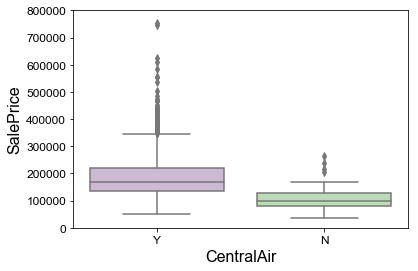

In [6]:
# 探索是否有中央空调CentralAir与售价SalePrice间的关系
# 设置刻度字体大小  
plt.xticks(fontsize = 12)  
plt.yticks(fontsize = 12)
# 设置坐标标签字体大小
plt.xlabel('CentralAir', fontsize = 16)  
plt.ylabel('SalePrice ($)', fontsize = 16)  

data = pd.concat([data_train['SalePrice'], data_train['CentralAir']], axis = 1)
sns.set_style('whitegrid')
fig = sns.boxplot(x = data['CentralAir'], y = data['SalePrice'], data = data, palette = 'PRGn')
fig.axis(ymin = 0, ymax = 800000)

print(data.groupby(['CentralAir']).describe().T)

OverallQual                1             2              3              4   \
SalePrice count      2.000000      3.000000      20.000000     116.000000   
          mean   50150.000000  51770.333333   87473.750000  108420.655172   
          std    15344.217152  14254.200796   24688.567399   29022.003886   
          min    39300.000000  35311.000000   37900.000000   34900.000000   
          25%    44725.000000  47655.500000   75500.000000   88000.000000   
          50%    50150.000000  60000.000000   86250.000000  108000.000000   
          75%    55575.000000  60000.000000   97500.000000  125500.000000   
          max    61000.000000  60000.000000  139600.000000  256000.000000   

OverallQual                 5              6              7              8   \
SalePrice count     397.000000     374.000000     319.000000     168.000000   
          mean   133523.347607  161603.034759  207716.423197  274735.535714   
          std     27107.330927   36090.182933   44466.259414   63898.

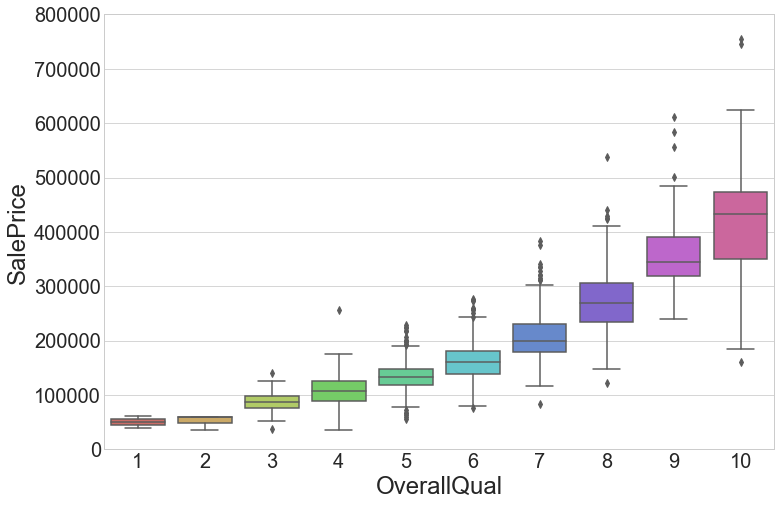

In [7]:
# 探索总体评价OverallQual与售价SalePrice间的关系
plt.style.use({'figure.figsize' : (12, 8)})
# 设置刻度字体大小  
plt.xticks(fontsize = 20)  
plt.yticks(fontsize = 20)
# 设置坐标标签字体大小
plt.xlabel('OverallQual', fontsize = 24)  
plt.ylabel('SalePrice ($)', fontsize = 24)

data = pd.concat([data_train['SalePrice'], data_train['OverallQual']], axis = 1)
sns.set_style('whitegrid')
fig = sns.boxplot(x = data['OverallQual'], y = data['SalePrice'], data = data, palette = 'hls')
fig.axis(ymin = 0, ymax = 800000)

print(data.groupby(['OverallQual']).describe().T)

YearBuilt            1872     1875           1880      1882           1885  \
SalePrice count       1.0      1.0       4.000000       1.0       2.000000   
          mean   122000.0  94000.0  200619.750000  168000.0  111250.000000   
          std         NaN      NaN   93021.399116       NaN   15909.902577   
          min    122000.0  94000.0  117500.000000  168000.0  100000.000000   
          25%    122000.0  94000.0  122375.000000  168000.0  105625.000000   
          50%    122000.0  94000.0  194989.500000  168000.0  111250.000000   
          75%    122000.0  94000.0  273234.250000  168000.0  116875.000000   
          max    122000.0  94000.0  295000.000000  168000.0  122500.000000   

YearBuilt                 1890           1892      1893      1898  \
SalePrice count       2.000000       2.000000       1.0       1.0   
          mean   142200.000000  291250.000000  325000.0  106000.0   
          std     24465.894629  259861.742086       NaN       NaN   
          min    1249

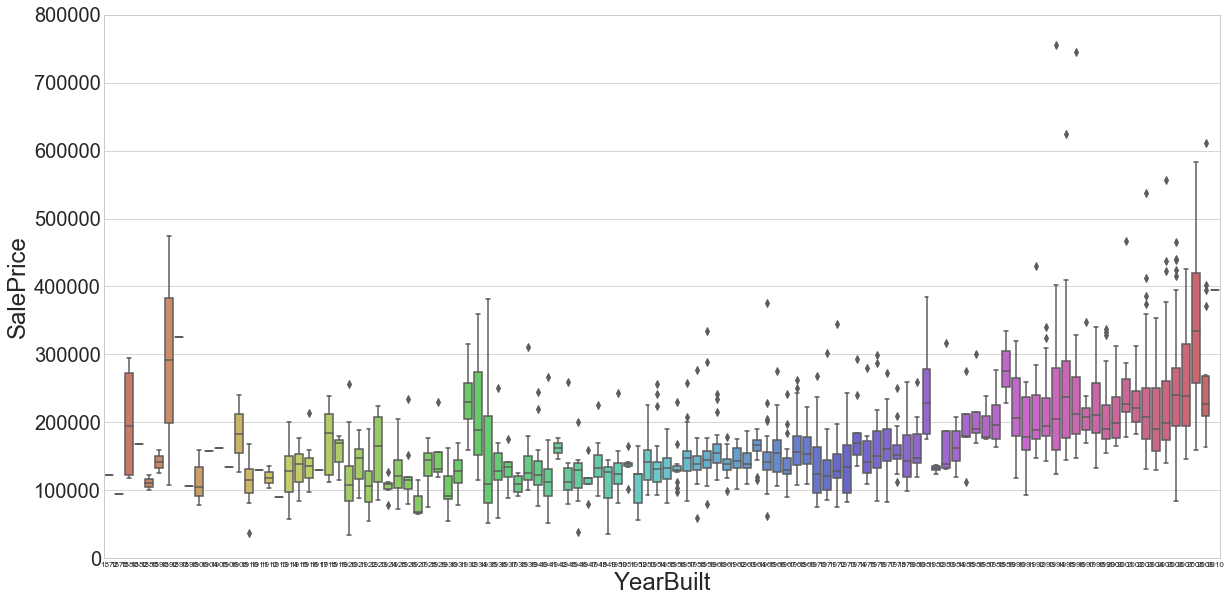

In [8]:
# 探索建造年份YearBuilt与售价SalePrice间的关系
plt.style.use({'figure.figsize' : (20, 10)})
# 设置刻度字体大小  
plt.xticks(fontsize = 8)  
plt.yticks(fontsize = 20)
# 设置坐标标签字体大小
plt.xlabel('YearBuilt', fontsize = 24)  
plt.ylabel('SalePrice ($)', fontsize = 24)

data = pd.concat([data_train['SalePrice'], data_train['YearBuilt']], axis = 1)
sns.set_style('whitegrid')
fig = sns.boxplot(x = data['YearBuilt'], y = data['SalePrice'], data = data, palette = 'hls')
fig.axis(ymin = 0, ymax = 800000)

print(data.groupby(['YearBuilt']).describe().T)

Text(32.625,0.5,'住房售价 ($)')

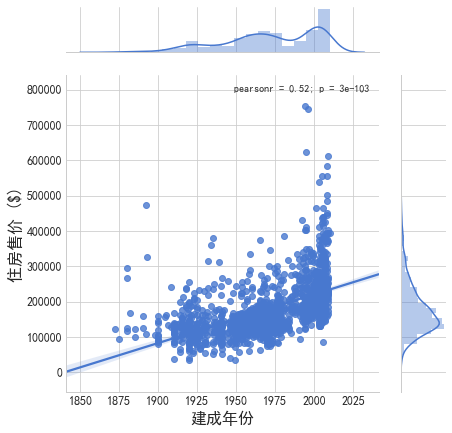

In [9]:
sns.set_palette('muted')
sns.jointplot(x = 'YearBuilt',
              y = 'SalePrice',
              data = data,
              kind = 'reg',
              space = 0.5,
              ratio = 5)

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号
# 设置刻度字体大小  
plt.xticks(fontsize = 12)  
plt.yticks(fontsize = 12)
# 设置坐标标签字体大小
plt.xlabel('建成年份', fontsize = 16)  
plt.ylabel('住房售价 ($)', fontsize = 16)

Neighborhood           Blmngtn        Blueste         BrDale        BrkSide  \
SalePrice count      17.000000       2.000000      16.000000      58.000000   
          mean   194870.882353  137500.000000  104493.750000  124834.051724   
          std     30393.229219   19091.883092   14330.176493   40348.689270   
          min    159895.000000  124000.000000   83000.000000   39300.000000   
          25%    174000.000000  130750.000000   91000.000000  100500.000000   
          50%    191000.000000  137500.000000  106000.000000  124300.000000   
          75%    213490.000000  144250.000000  118000.000000  141175.000000   
          max    264561.000000  151000.000000  125000.000000  223500.000000   

Neighborhood           ClearCr        CollgCr        Crawfor        Edwards  \
SalePrice count      28.000000     150.000000      51.000000     100.000000   
          mean   212565.428571  197965.773333  210624.725490  128219.700000   
          std     50231.538993   51403.666438   688

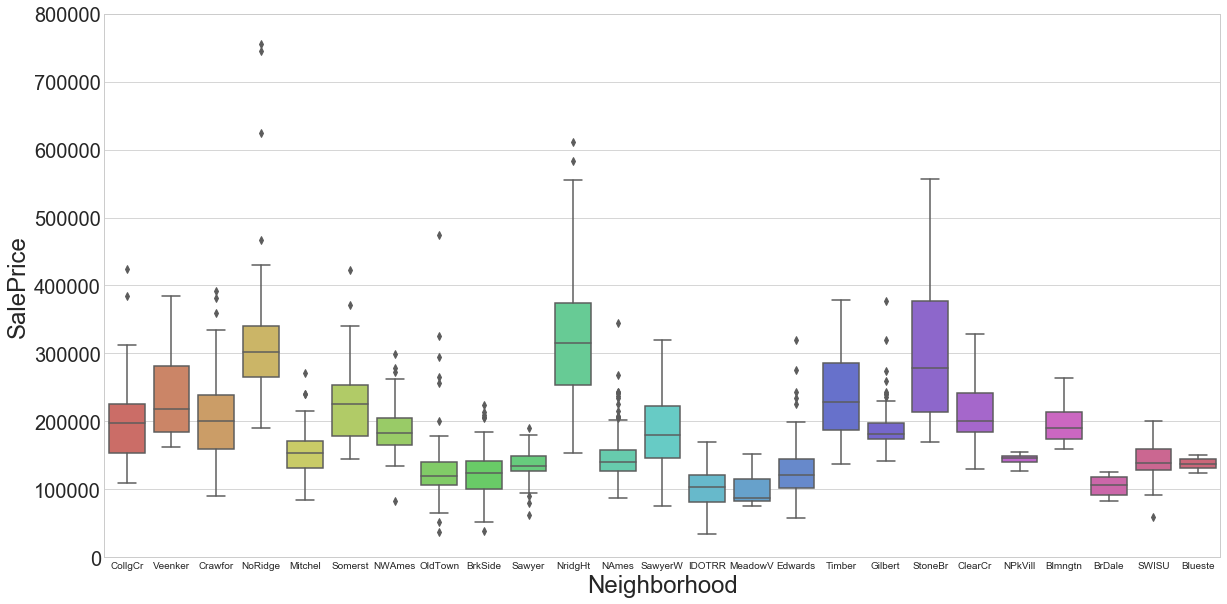

In [10]:
# 探索地段Neighborhood与售价SalePrice间的关系
plt.style.use({'figure.figsize' : (20, 10)})
# 设置刻度字体大小  
plt.xticks(fontsize = 10)  
plt.yticks(fontsize = 20)
# 设置坐标标签字体大小
plt.xlabel('Neighborhood', fontsize = 24)  
plt.ylabel('SalePrice ($)', fontsize = 24)

data = pd.concat([data_train['SalePrice'], data_train['Neighborhood']], axis = 1)
sns.set_style('whitegrid')
fig = sns.boxplot(x = data['Neighborhood'], y = data['SalePrice'], data = data, palette = 'hls')
fig.axis(ymin = 0, ymax = 800000)

print(data.groupby(['Neighborhood']).describe().T)

Text(32.625,0.5,'住房售价 ($)')

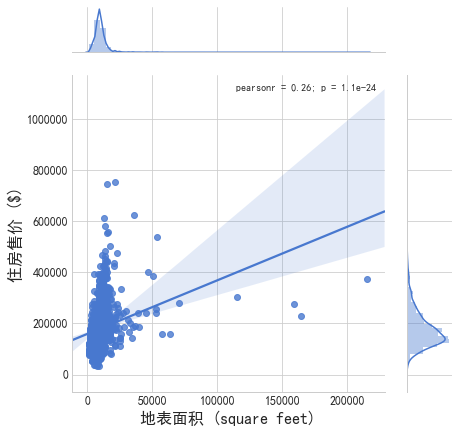

In [11]:
# 探索地表面积LotArea与售价SalePrice间的关系
data = pd.concat([data_train['SalePrice'], data_train['LotArea']], axis = 1)
sns.set_palette('muted')
sns.jointplot(x = 'LotArea',
              y = 'SalePrice',
              data = data,
              kind = 'reg',
              space = 0.5,
              ratio = 5)

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号
# 设置刻度字体大小  
plt.xticks(fontsize = 12)  
plt.yticks(fontsize = 12)
# 设置坐标标签字体大小
plt.xlabel('地表面积 (square feet)', fontsize = 16)  
plt.ylabel('住房售价 ($)', fontsize = 16)

Text(31.5,0.5,'住房售价 ($)')

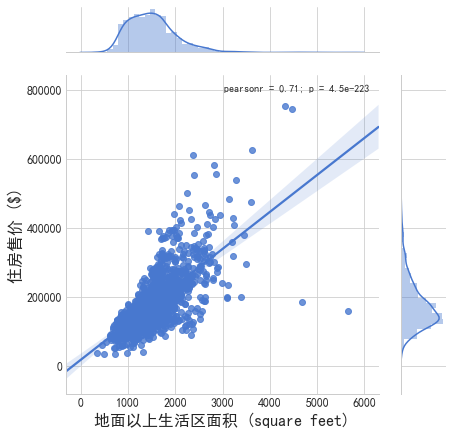

In [12]:
# 探索地面以上生活区面积GrLivArea与售价SalePrice间的关系
data = pd.concat([data_train['SalePrice'], data_train['GrLivArea']], axis = 1)
sns.set_palette('muted')
sns.jointplot(x = 'GrLivArea',
              y = 'SalePrice',
              data = data,
              kind = 'reg',
              space = 0.5,
              ratio = 5)

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号
# 设置刻度字体大小  
plt.xticks(fontsize = 12)  
plt.yticks(fontsize = 12)
# 设置坐标标签字体大小
plt.xlabel('地面以上生活区面积 (square feet)', fontsize = 16)  
plt.ylabel('住房售价 ($)', fontsize = 16)

Text(31.5,0.5,'住房售价 ($)')

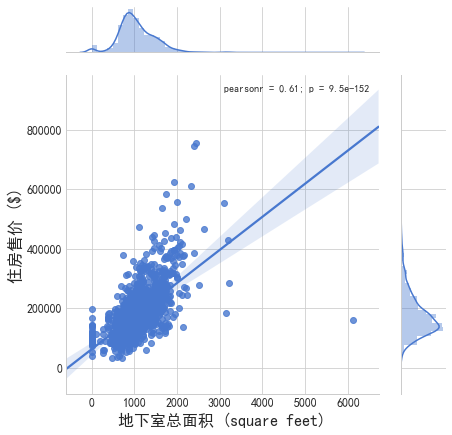

In [13]:
# 探索地下室总面积TotalBsmtSF与售价SalePrice间的关系
data = pd.concat([data_train['SalePrice'], data_train['TotalBsmtSF']], axis = 1)
sns.set_palette('muted')
sns.jointplot(x = 'TotalBsmtSF',
              y = 'SalePrice',
              data = data,
              kind = 'reg',
              space = 0.5,
              ratio = 5)

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号
# 设置刻度字体大小  
plt.xticks(fontsize = 12)  
plt.yticks(fontsize = 12)
# 设置坐标标签字体大小
plt.xlabel('地下室总面积 (square feet)', fontsize = 16)  
plt.ylabel('住房售价 ($)', fontsize = 16)

Text(31.5,0.5,'住房售价 ($)')

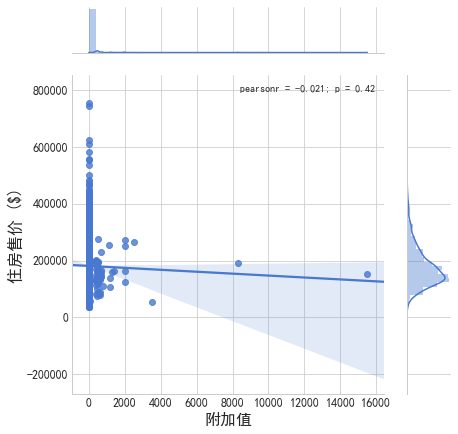

In [14]:
# 探索附加值MiscVal与售价SalePrice间的关系
data = pd.concat([data_train['SalePrice'], data_train['MiscVal']], axis = 1)
sns.set_palette('muted')
sns.jointplot(x = 'MiscVal',
              y = 'SalePrice',
              data = data,
              kind = 'reg',
              space = 0.5,
              ratio = 5)

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号
# 设置刻度字体大小  
plt.xticks(fontsize = 12)  
plt.yticks(fontsize = 12)
# 设置坐标标签字体大小
plt.xlabel('附加值', fontsize = 16)  
plt.ylabel('住房售价 ($)', fontsize = 16)

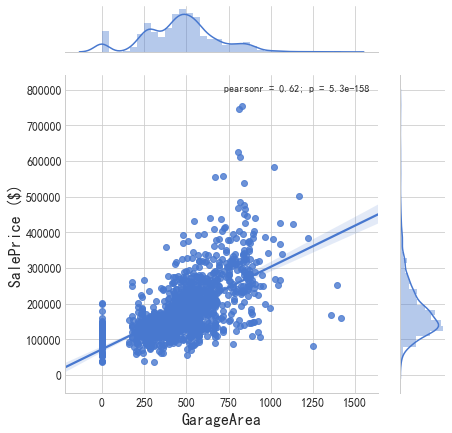

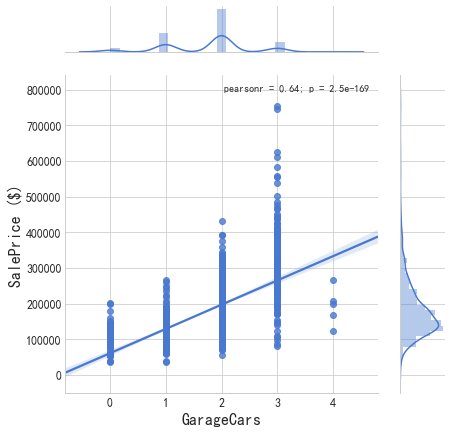

In [15]:
features  = ['GarageArea', 'GarageCars']

for f in range(len(features)):
    data = pd.concat([data_train['SalePrice'], data_train[features[f]]], axis = 1)
    sns.set_palette('muted')
    sns.jointplot(x = features[f],
                  y = 'SalePrice',
                  data = data,
                  kind = 'reg',
                  space = 0.5,
                  ratio = 5)
    
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签  
    plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号
    # 设置刻度字体大小  
    plt.xticks(fontsize = 12)  
    plt.yticks(fontsize = 12)
    # 设置坐标标签字体大小
    plt.xlabel(features[f], fontsize = 16)  
    plt.ylabel('SalePrice ($)', fontsize = 16)

3、数据清洗

In [16]:
data_train = data_train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis = 1)
data = data_train.drop(['Id'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

In [17]:
# 填充缺失值
data['MasVnrType'].fillna('None', inplace = True)
data['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [18]:
data['BsmtQual'].fillna('None', inplace = True)
data['BsmtQual'].value_counts()

TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64

In [19]:
data['BsmtCond'].fillna('None', inplace = True)
data['BsmtCond'].value_counts()

TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64

In [20]:
data['BsmtExposure'].fillna('No', inplace = True)
data['BsmtExposure'].value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [21]:
data['BsmtFinType1'].fillna('None', inplace = True)
data['BsmtFinType1'].value_counts()

Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64

In [22]:
data['BsmtFinType2'].fillna('None', inplace = True)
data['BsmtFinType2'].value_counts()

Unf     1256
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64

In [23]:
data['Electrical'].fillna('None', inplace = True)
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
None        1
Mix         1
Name: Electrical, dtype: int64

In [24]:
data['GarageType'].fillna('None', inplace = True)
data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [25]:
data['GarageFinish'].fillna('None', inplace = True)
data['GarageFinish'].value_counts()

Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64

In [26]:
data['GarageQual'].fillna('None', inplace = True)
data['GarageQual'].value_counts()

TA      1311
None      81
Fa        48
Gd        14
Po         3
Ex         3
Name: GarageQual, dtype: int64

In [27]:
data['GarageCond'].fillna('None', inplace = True)
data['GarageCond'].value_counts()

TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64

In [28]:
data['GarageCond'].fillna('None', inplace = True)
data['GarageCond'].value_counts()

TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64

In [29]:
features = ['MSZoning',
            'Street',
            'LotShape',
            'LandContour',
            'Utilities',
            'LotConfig',
            'LandSlope',
            'Neighborhood',
            'Condition1',
            'Condition2',
            'BldgType',
            'HouseStyle',
            'RoofStyle',
            'RoofMatl',
            'Exterior1st',
            'Exterior2nd',
            'MasVnrType',
            'ExterQual',
            'ExterCond',
            'Foundation',
            'BsmtQual',
            'BsmtCond',
            'BsmtExposure',
            'BsmtFinType1',
            'BsmtFinType2',
            'Heating',
            'HeatingQC',
            'CentralAir',
            'Electrical',
            'KitchenQual',
            'Functional',
            'GarageType',
            'GarageFinish',
            'GarageQual',
            'GarageCond',
            'PavedDrive',
            'SaleType',
            'SaleCondition']

from sklearn import preprocessing
for col in data.columns:
    if col in features:
        label = preprocessing.LabelEncoder()
        data[col] = label.fit_transform(data[col])
    else:
        data[col].fillna(data[col].mean(), inplace = True)

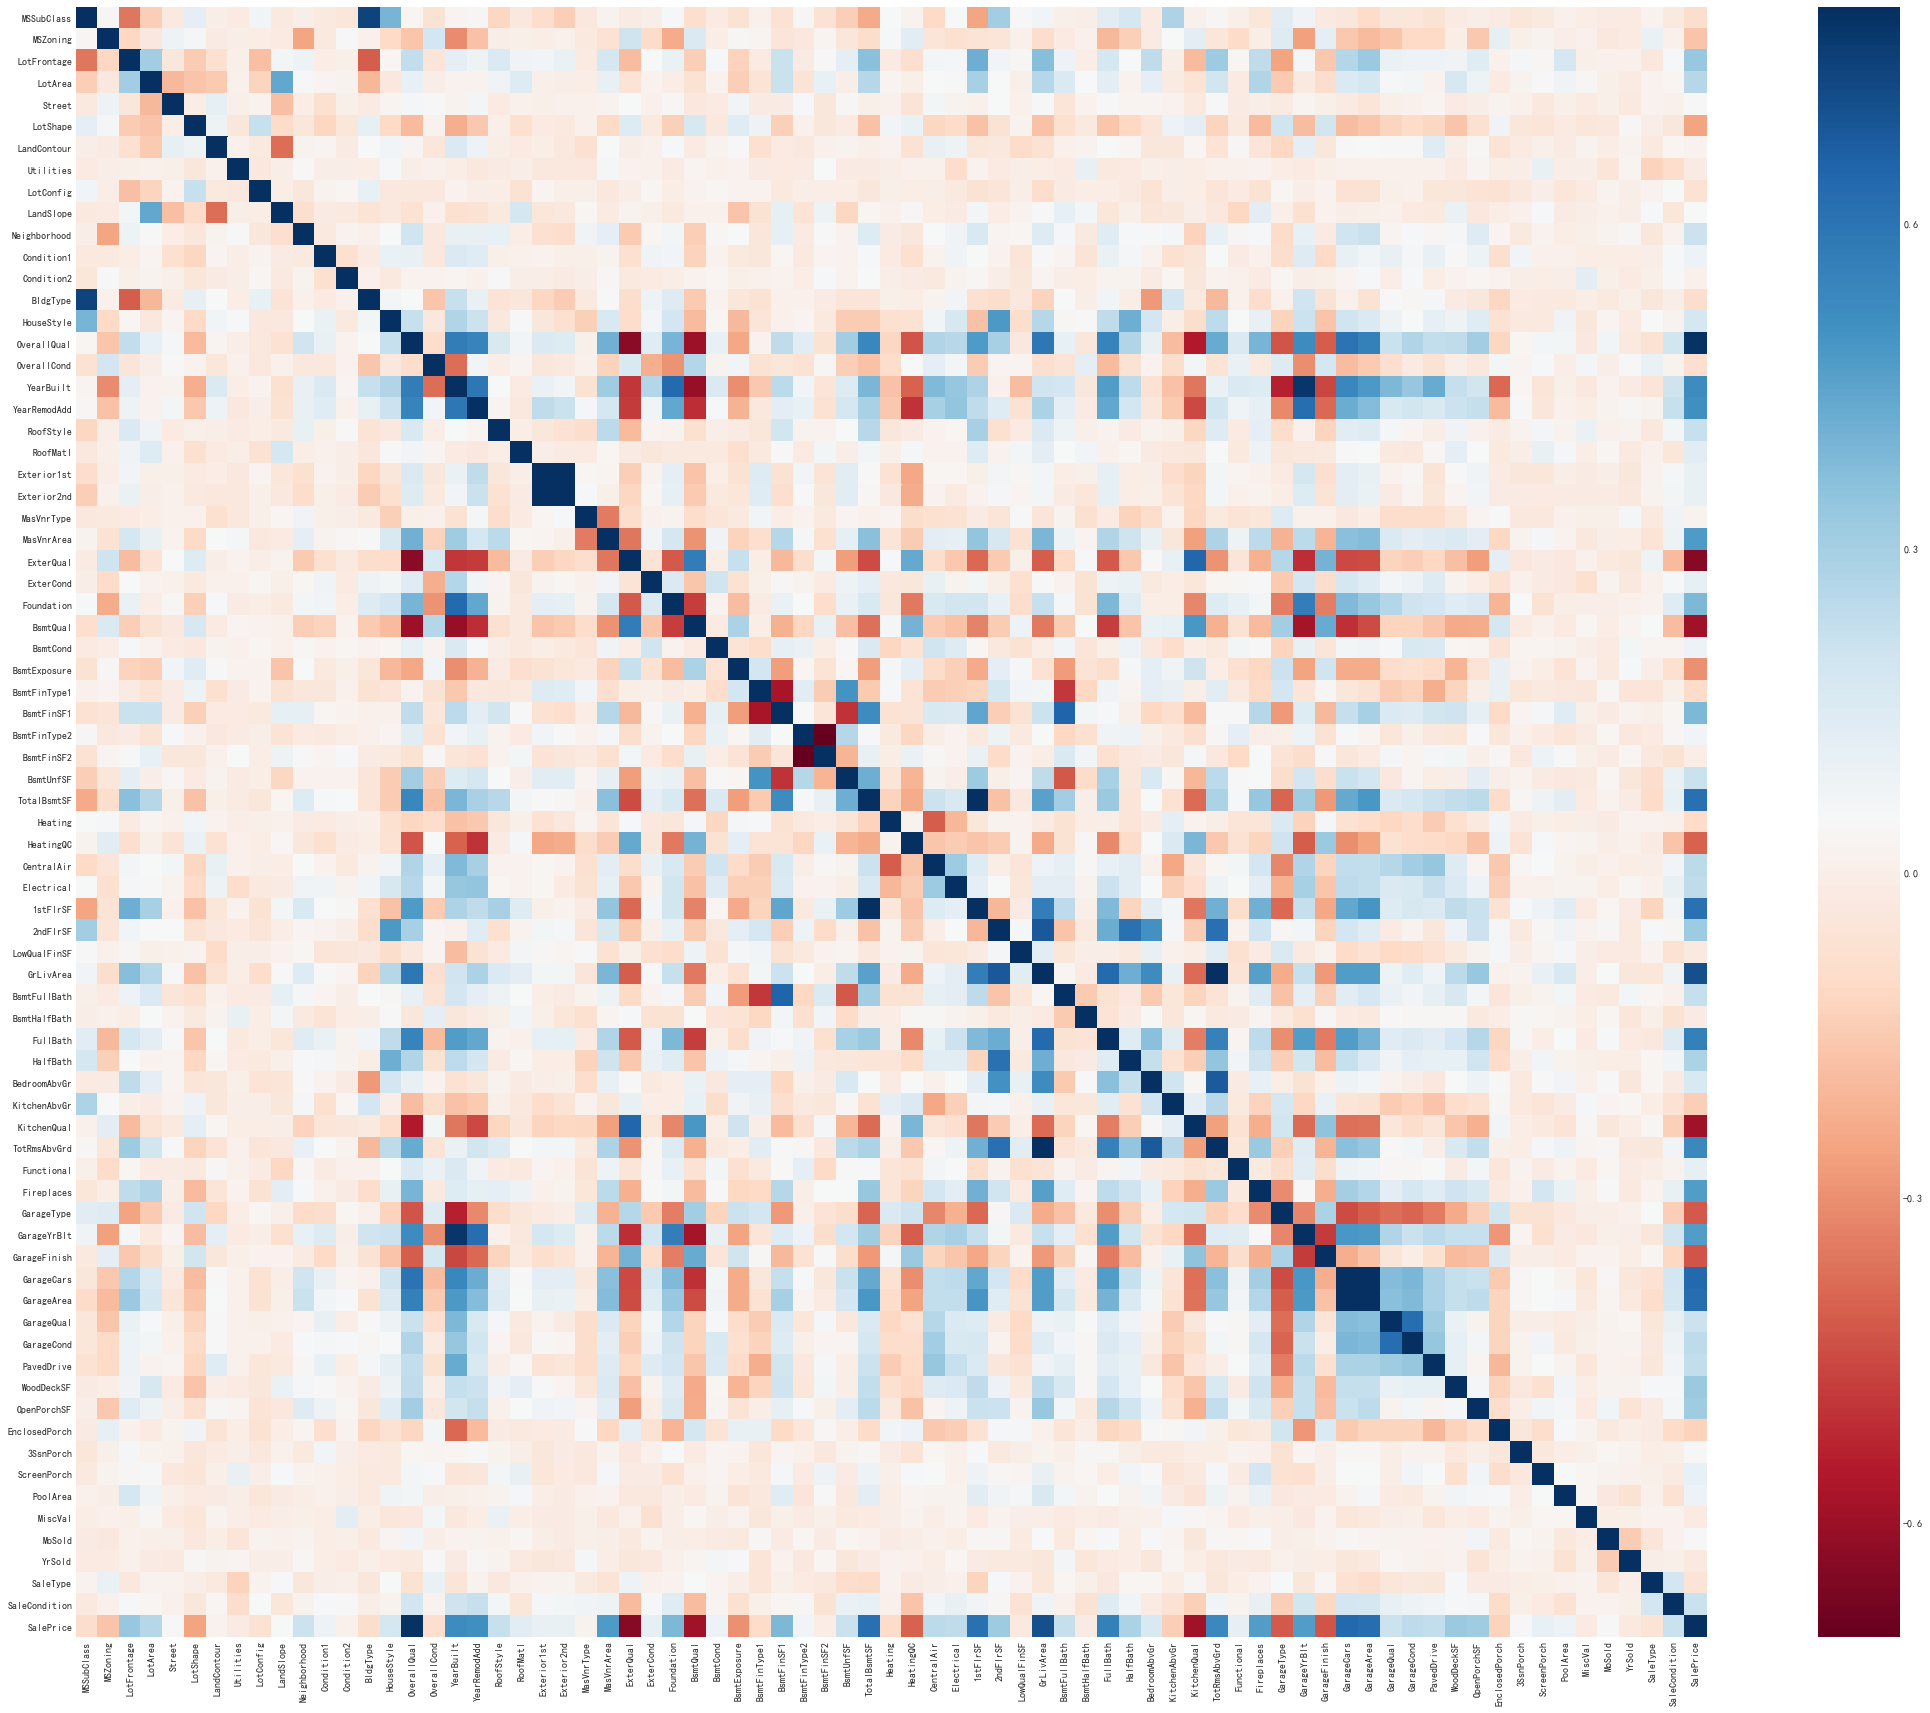

In [30]:
corr = data.corr()
f, ax = plt.subplots(figsize = (40, 30))
sns.heatmap(corr, cmap = 'RdBu', vmax = 0.8, square = True)

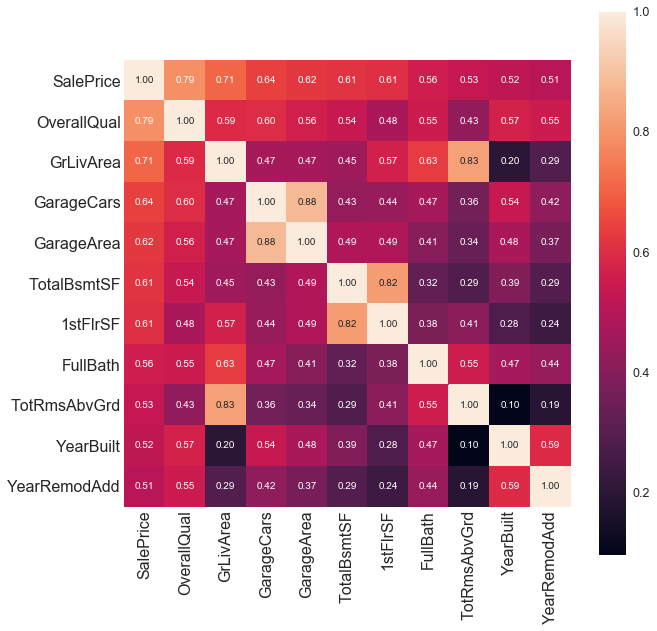

In [31]:
k  = 11
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)

f, ax = plt.subplots(figsize = (10, 10))
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm,
                 cbar = True,
                 annot = True,
                 square = True,
                 fmt = '.2f',
                 annot_kws = {'size' : 10},
                 yticklabels = cols.values,
                 xticklabels = cols.values)


# 设置刻度字体大小  
plt.xticks(fontsize = 16)  
plt.yticks(fontsize = 16)
plt.show()

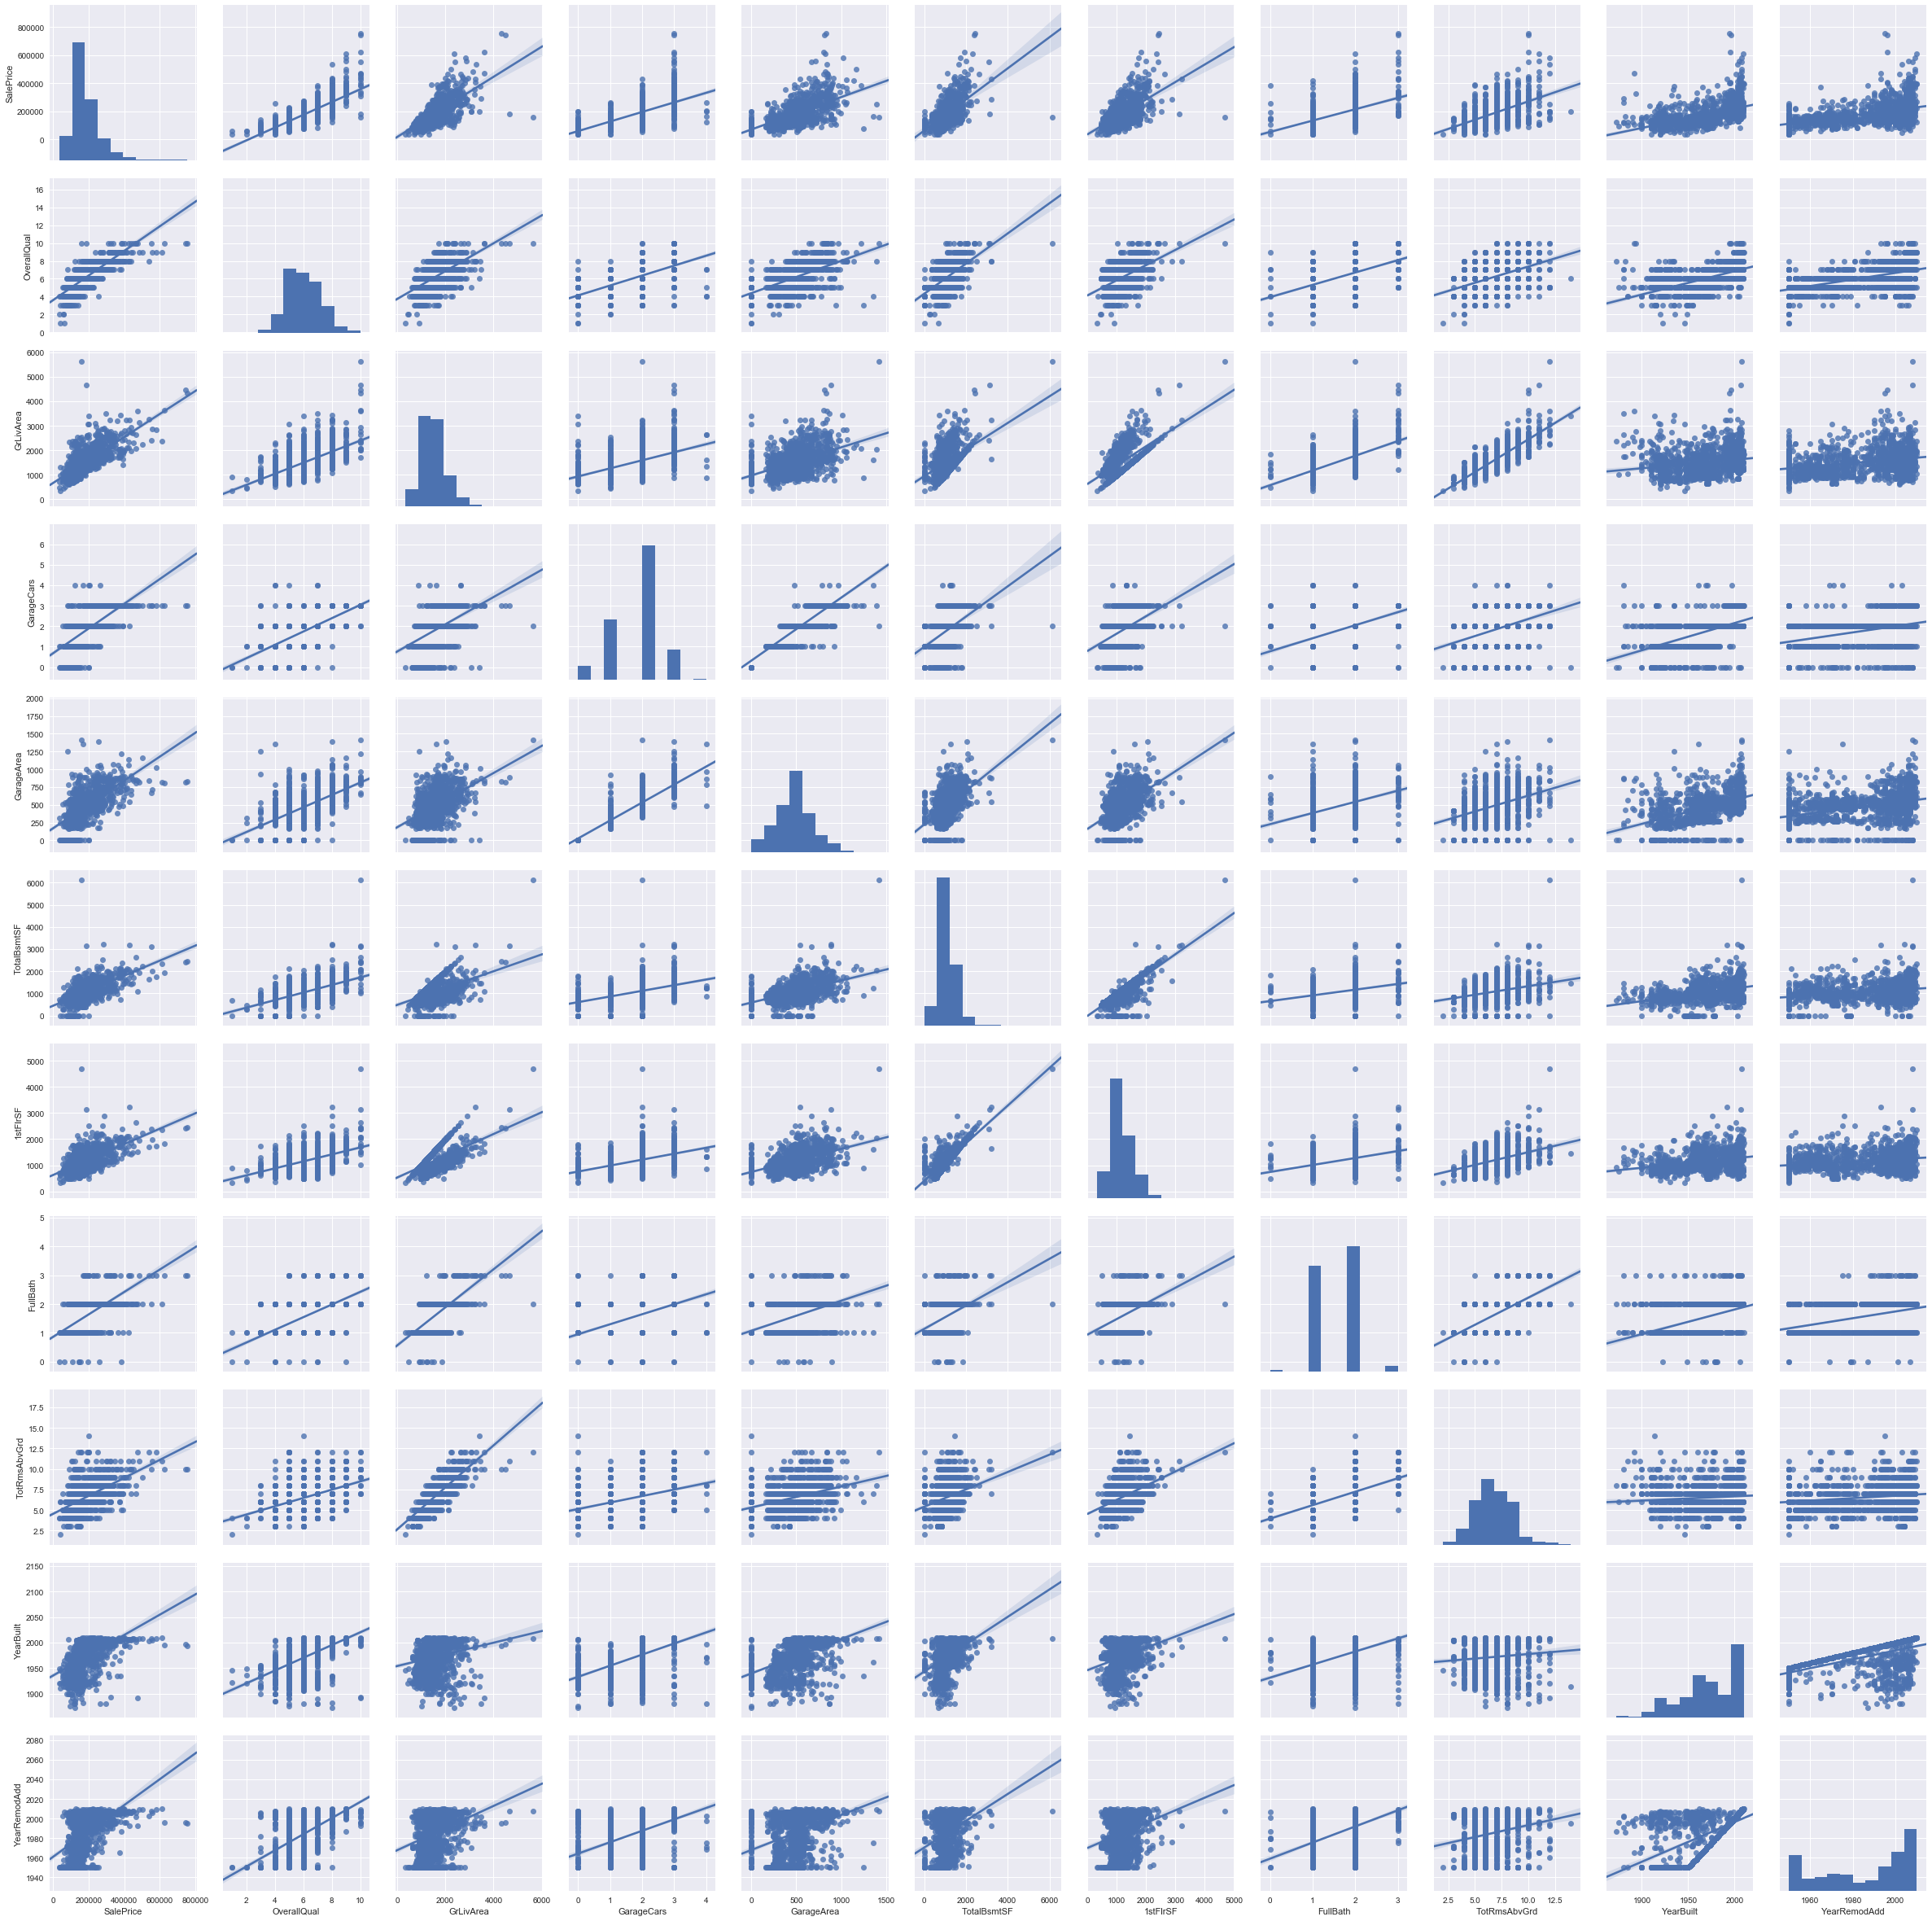

In [32]:
sns.set()
features = ['SalePrice',
            'OverallQual',
            'GrLivArea',
            'GarageCars',
            'GarageArea',
            'TotalBsmtSF',
            '1stFlrSF',
            'FullBath',
            'TotRmsAbvGrd',
            'YearBuilt',
            'YearRemodAdd']
sns.pairplot(data = data[features], kind = 'reg', size = 3)
plt.show()

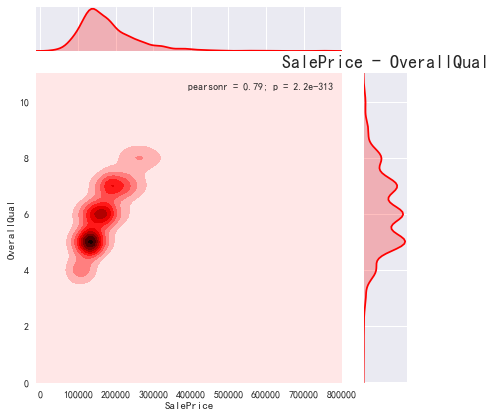

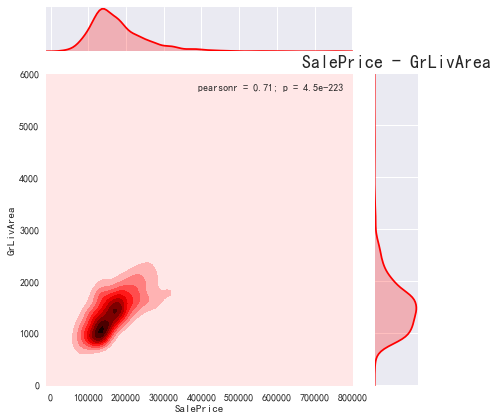

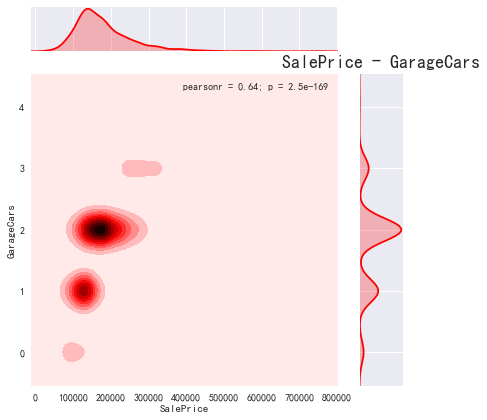

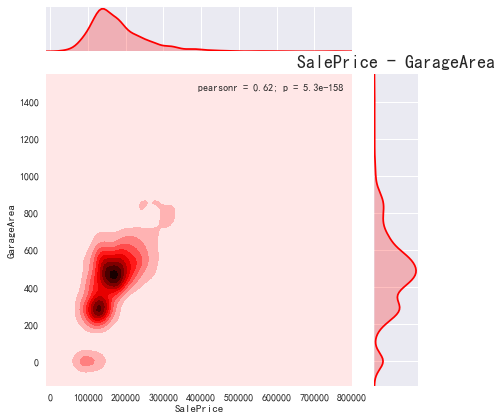

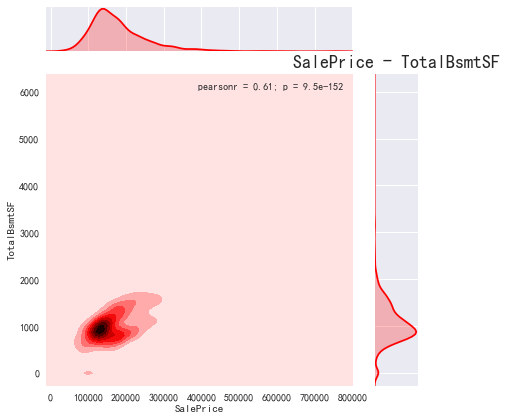

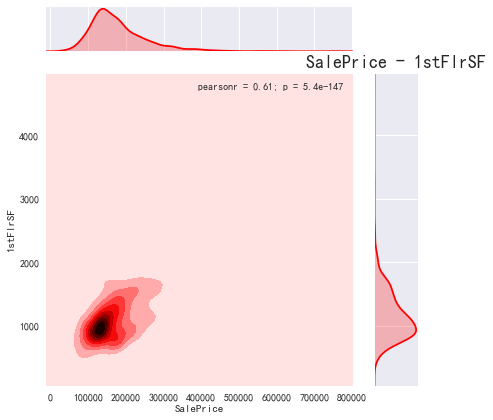

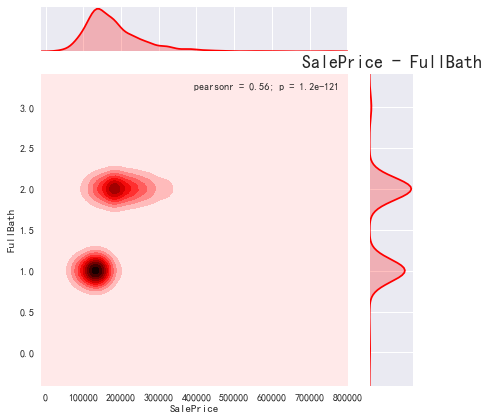

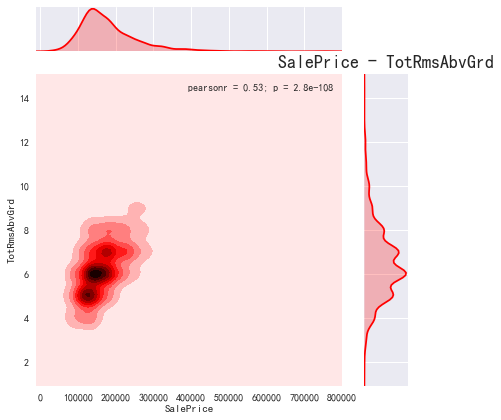

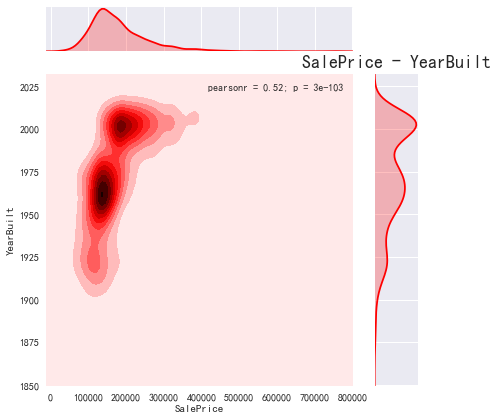

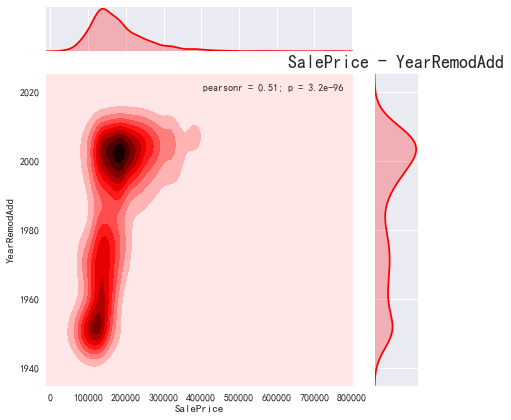

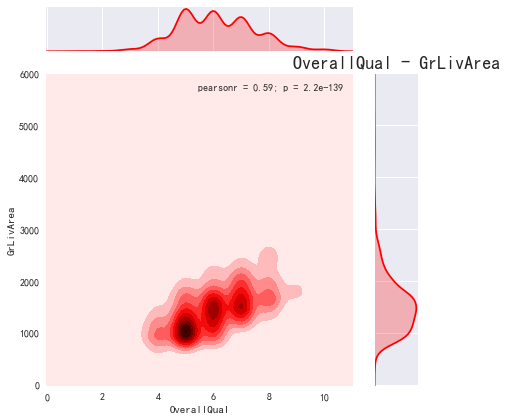

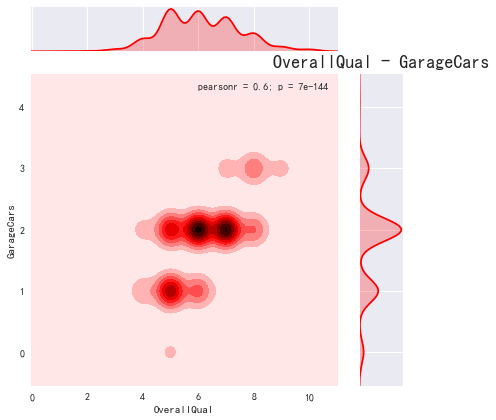

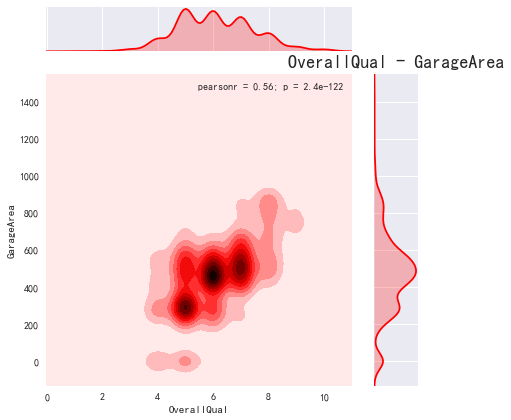

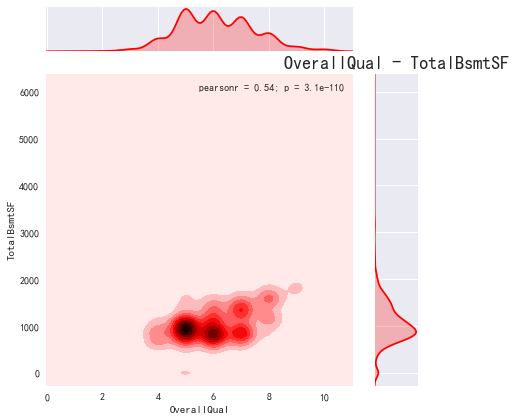

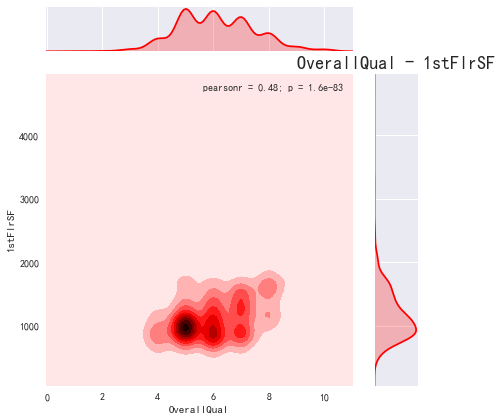

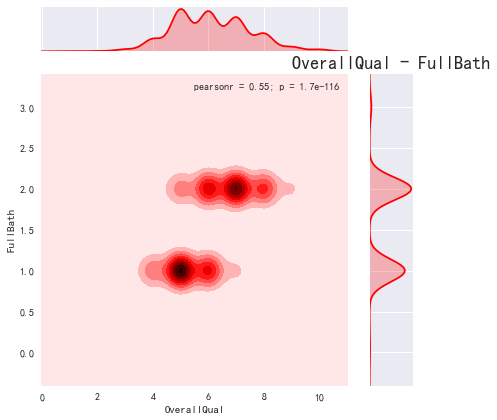

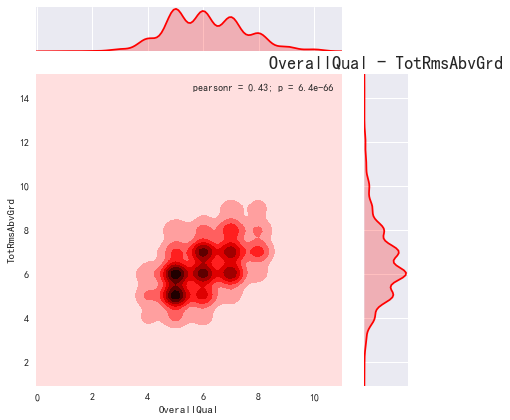

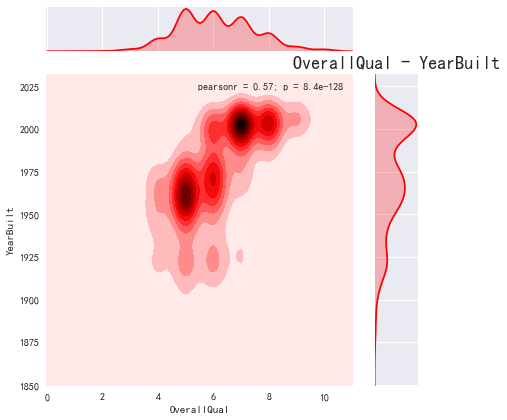

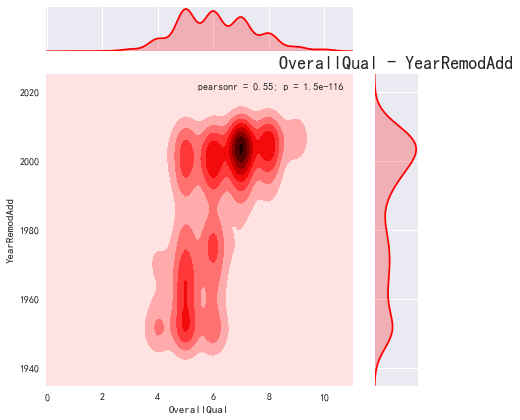

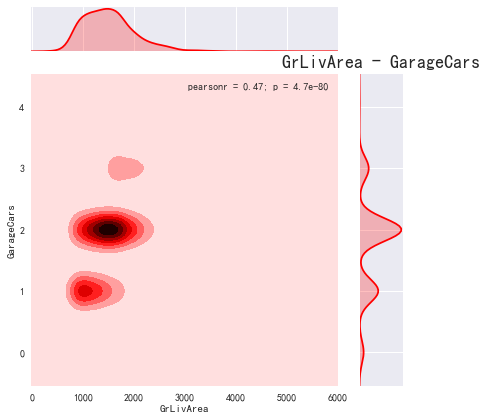

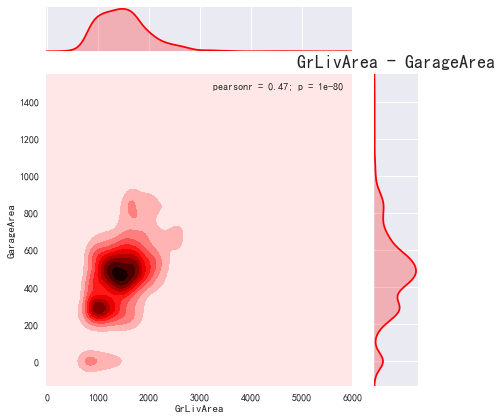

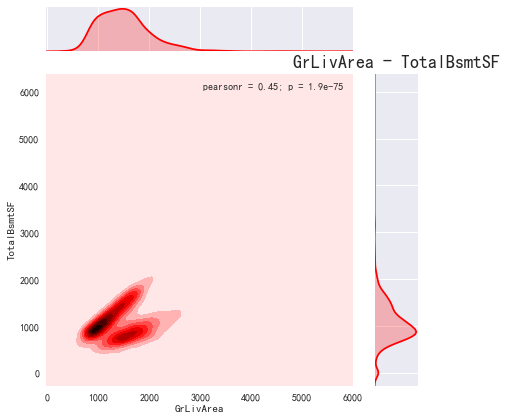

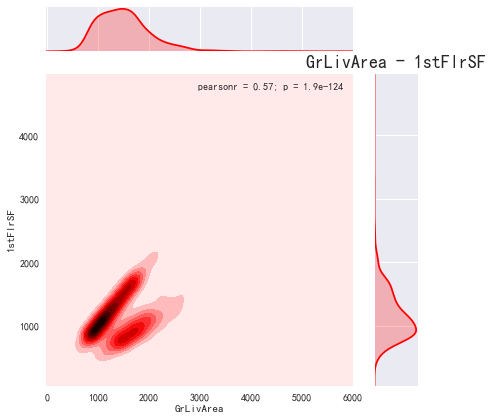

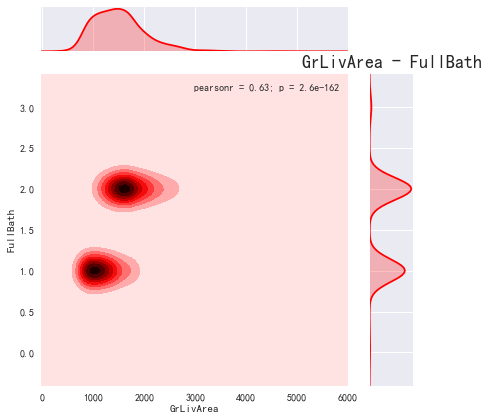

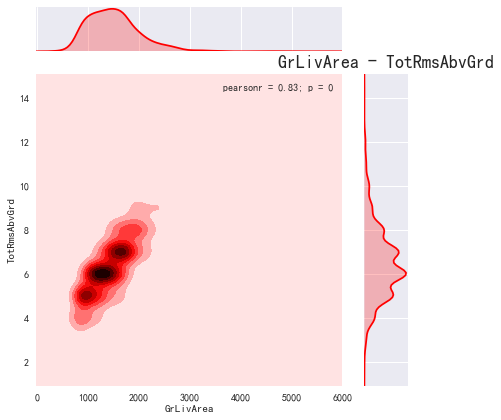

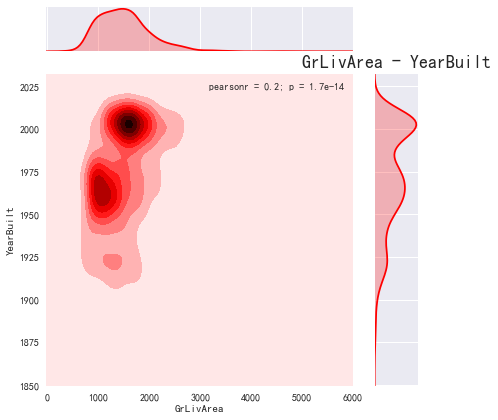

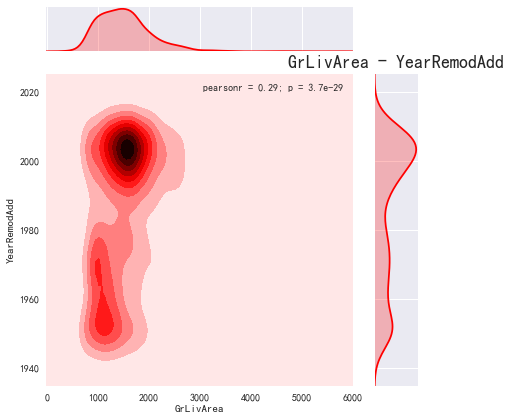

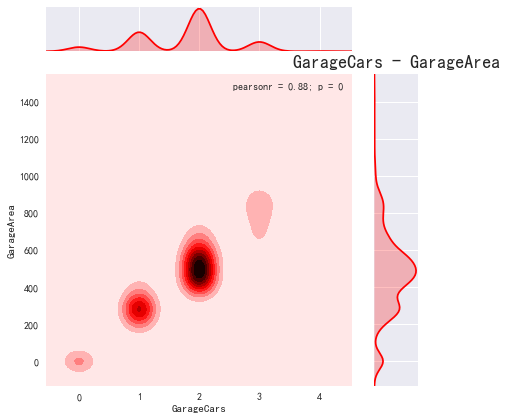

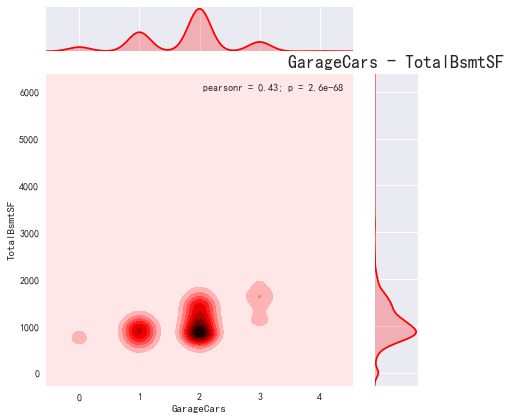

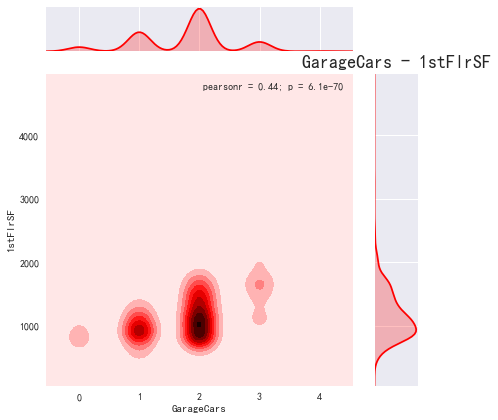

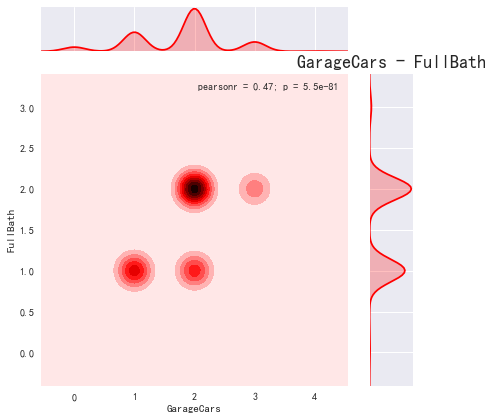

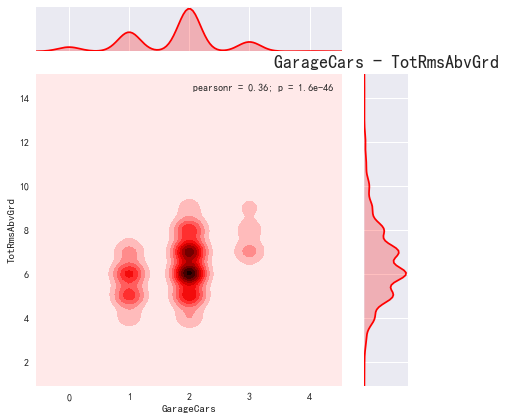

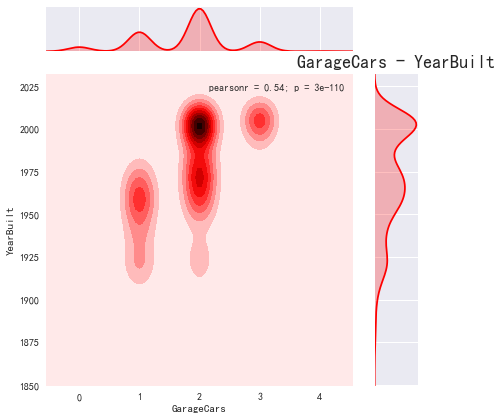

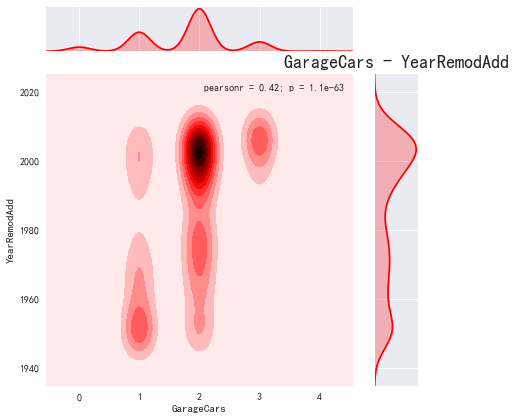

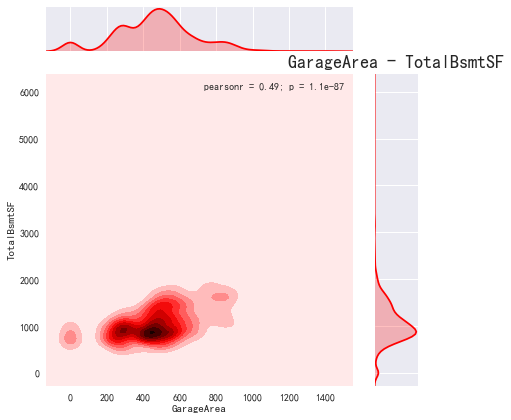

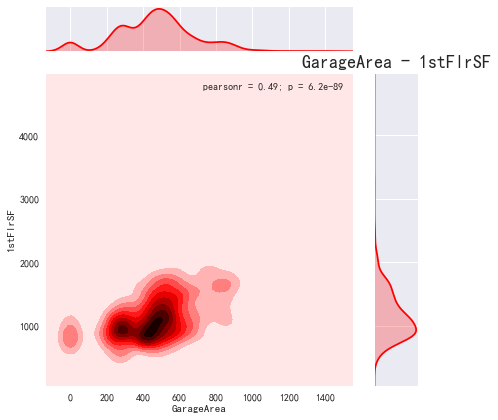

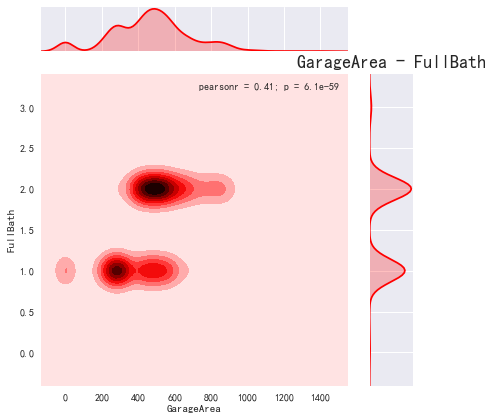

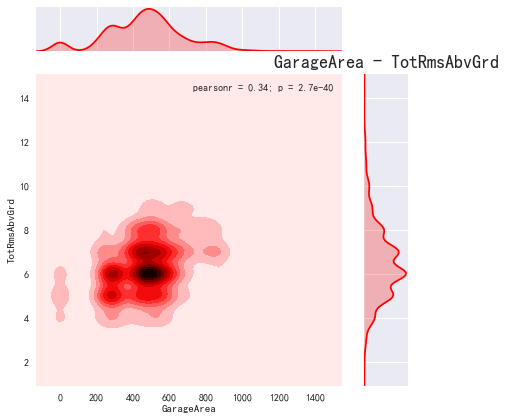

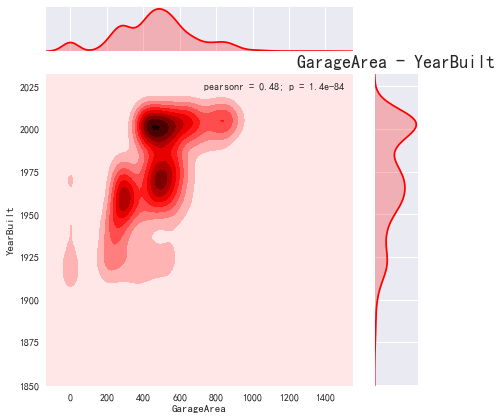

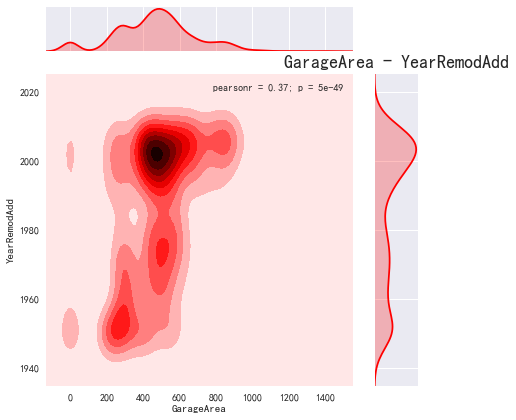

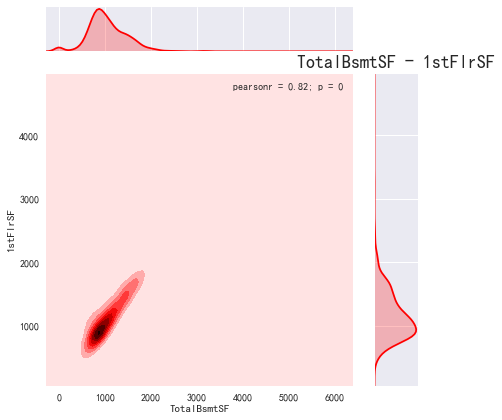

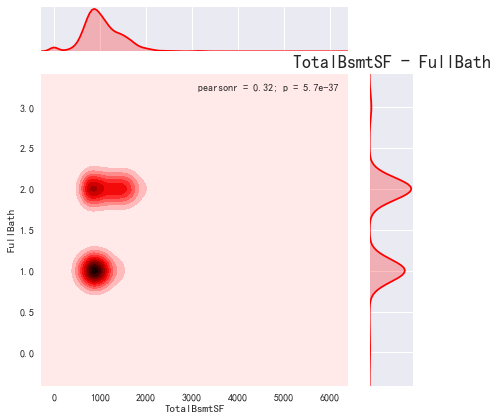

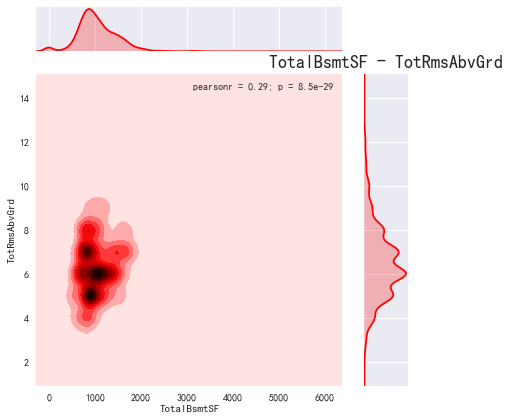

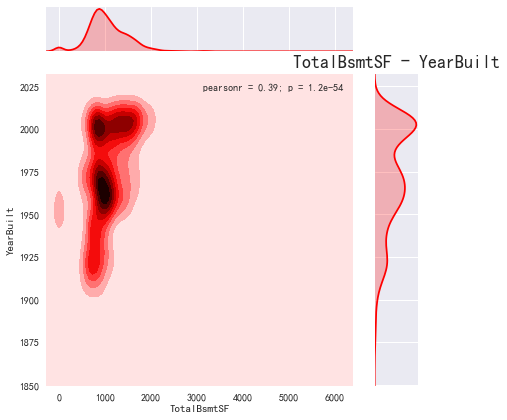

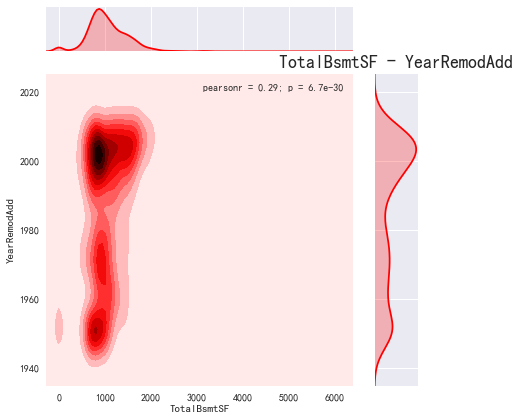

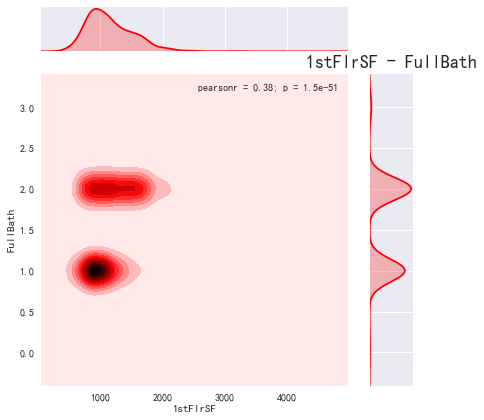

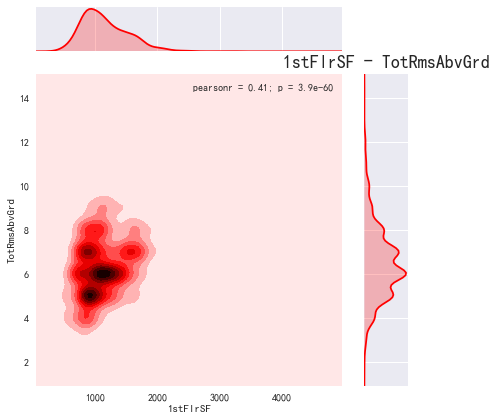

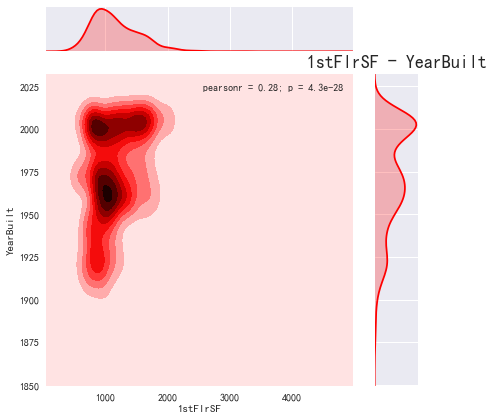

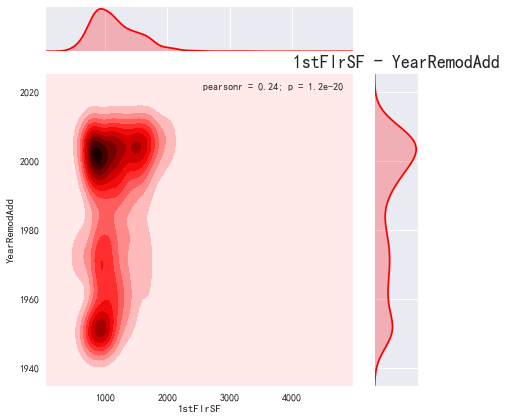

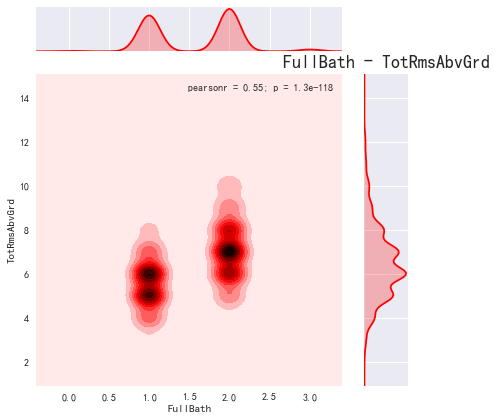

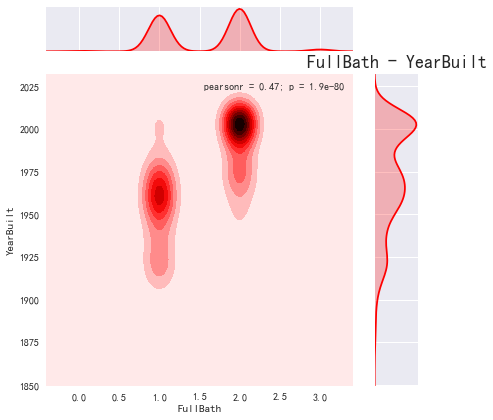

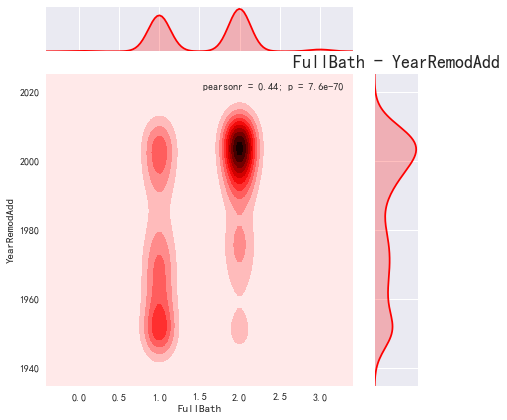

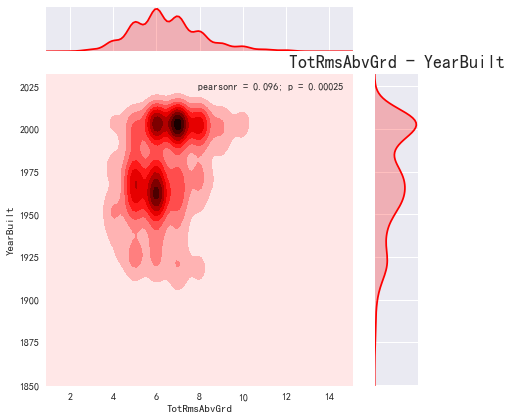

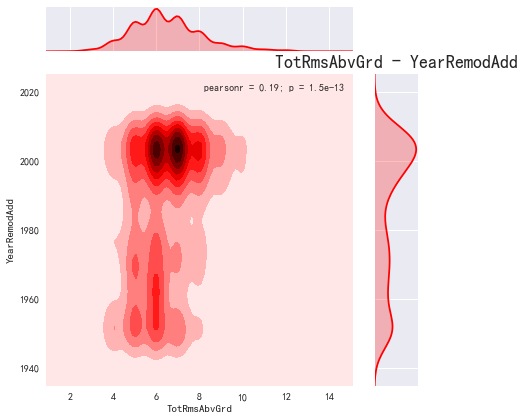

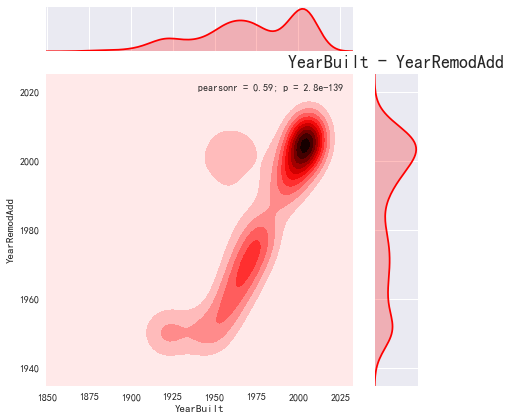

In [33]:
for i in range(len(features) - 1):
    for j in range(i + 1, len(features)):
        data_sub = pd.concat([data[features[i]], data[features[j]]], axis = 1)
        sns.set_palette('muted')
        sns.jointplot(x = features[i],
                      y = features[j],
                      data = data_sub,
                      kind = 'kde',
                      color = 'r',
                      space = 0.5,
                      ratio = 5)
        
        plt.title(features[i] + ' - ' + features[j], fontsize = 18)
        plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签  
        plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号

4、训练模型

In [34]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, average_precision_score

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
features = ['OverallQual',
            'GrLivArea',
            'GarageCars',
            'GarageArea',
            'TotalBsmtSF',
            '1stFlrSF',
            'FullBath',
            'TotRmsAbvGrd',
            'YearBuilt',
            'YearRemodAdd']
y = data['SalePrice'].values
x = data[features].values
x_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(x_scaled,
                                                    y_scaled,
                                                    test_size = 0.31,
                                                    random_state = 42)

In [36]:
clfs = {
    'LinearRegression':linear_model.LinearRegression(),
    'BayesianRidge':linear_model.BayesianRidge(),
    'SGDRegressor':linear_model.SGDRegressor(),
    'SVM':svm.SVR(),
    'RandomForestRegressor':RandomForestRegressor(n_estimators = 500)
}

for clf in clfs:
    try:
        clfs[clf].fit(X_train, y_train)
        y_pred = clfs[clf].predict(X_test)
        print(clf + ' cost : ' + str(clfs[clf].score(X_test, y_test)))
    except Exception as e:
        print(clf + ' Error: ')
        print(str(e))

LinearRegression cost : 0.8013684878101384
BayesianRidge cost : 0.8010917778589266
SGDRegressor cost : 0.8030422355606723
SVM cost : 0.8443711838457594
RandomForestRegressor cost : 0.8932761984347446


In [37]:
# 随机森林RF回归
clf_rf = RandomForestRegressor(n_estimators = 500, oob_score = True)
clf_rf.fit(X_train, y_train)
print('oob score: ', clf_rf.oob_score_)

y_pred = clf_rf.predict(X_test)
print('RandomForest Score : %f\n' % clf_rf.score(X_test, y_test))

importances = clf_rf.feature_importances_
indices = np.argsort(importances)[:: -1]
for f in range(len(features)):
    print('%2d) %-*s %f' % (f + 1, 30, features[indices[f]], importances[indices[f]]))

oob score:  0.7945517499739154
RandomForest Score : 0.892460

 1) OverallQual                    0.561648
 2) GrLivArea                      0.169243
 3) TotalBsmtSF                    0.063590
 4) 1stFlrSF                       0.051243
 5) YearBuilt                      0.036777
 6) GarageArea                     0.035876
 7) YearRemodAdd                   0.028562
 8) GarageCars                     0.024602
 9) TotRmsAbvGrd                   0.017716
10) FullBath                       0.010742


In [38]:
features = data.columns.drop(['SalePrice'])
y = data['SalePrice'].values
x = data[features].values
x_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(x_scaled,
                                                    y_scaled,
                                                    test_size = 0.31,
                                                    random_state = 5)

In [39]:
# 网格搜索
from sklearn.grid_search import GridSearchCV
# 测试n_estimators参数
tree_param_grid = {'n_estimators':list(range(100, 1100, 100))}  # 树变量
gsearch = GridSearchCV(
    estimator = RandomForestRegressor(oob_score = True,
                                      n_jobs = 4,
                                      random_state = 5),
    param_grid = tree_param_grid,
    cv = 5,
    n_jobs = -1)

gsearch.fit(X_train, y_train.ravel())
print('grid scores :\n', gsearch.grid_scores_)
print('\nbest params : ', gsearch.best_params_)
print('\nbest score : ', gsearch.best_score_)

D:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


grid scores :
 [mean: 0.83177, std: 0.07422, params: {'n_estimators': 100}, mean: 0.83460, std: 0.07388, params: {'n_estimators': 200}, mean: 0.83549, std: 0.07427, params: {'n_estimators': 300}, mean: 0.83563, std: 0.07668, params: {'n_estimators': 400}, mean: 0.83607, std: 0.07528, params: {'n_estimators': 500}, mean: 0.83560, std: 0.07599, params: {'n_estimators': 600}, mean: 0.83532, std: 0.07603, params: {'n_estimators': 700}, mean: 0.83567, std: 0.07543, params: {'n_estimators': 800}, mean: 0.83548, std: 0.07633, params: {'n_estimators': 900}, mean: 0.83581, std: 0.07625, params: {'n_estimators': 1000}]

best params :  {'n_estimators': 500}

best score :  0.8360735574279693


In [40]:
# 测试max_depth参数
tree_param_grid = {'max_depth':list(range(3, 16, 2))}  # 树变量
gsearch = GridSearchCV(
    estimator = RandomForestRegressor(n_estimators = 500,
                                      oob_score = True,
                                      n_jobs = 4,
                                      random_state = 5),
    param_grid = tree_param_grid,
    cv = 5,
    n_jobs = -1)

gsearch.fit(X_train, y_train.ravel())
print('grid scores :\n', gsearch.grid_scores_)
print('\nbest params : ', gsearch.best_params_)
print('\nbest score : ', gsearch.best_score_)

grid scores :
 [mean: 0.74537, std: 0.06252, params: {'max_depth': 3}, mean: 0.80853, std: 0.07627, params: {'max_depth': 5}, mean: 0.82974, std: 0.07417, params: {'max_depth': 7}, mean: 0.83522, std: 0.07501, params: {'max_depth': 9}, mean: 0.83733, std: 0.07356, params: {'max_depth': 11}, mean: 0.83588, std: 0.07614, params: {'max_depth': 13}, mean: 0.83514, std: 0.07704, params: {'max_depth': 15}]

best params :  {'max_depth': 11}

best score :  0.837329925084947


In [41]:
# 测试max_features参数
tree_param_grid = {'max_features':list(range(3, 75))}  # 树变量
gsearch = GridSearchCV(
    estimator = RandomForestRegressor(n_estimators = 500,
                                      max_depth = 11,
                                      oob_score = True,
                                      n_jobs = 4,
                                      random_state = 5),
    param_grid = tree_param_grid,
    cv = 5,
    n_jobs = -1)

gsearch.fit(X_train, y_train.ravel())
print('grid scores :\n', gsearch.grid_scores_)
print('\nbest params : ', gsearch.best_params_)
print('\nbest score : ', gsearch.best_score_)

grid scores :
 [mean: 0.82431, std: 0.05365, params: {'max_features': 3}, mean: 0.83405, std: 0.05228, params: {'max_features': 4}, mean: 0.83797, std: 0.05392, params: {'max_features': 5}, mean: 0.84134, std: 0.05391, params: {'max_features': 6}, mean: 0.84432, std: 0.05437, params: {'max_features': 7}, mean: 0.84471, std: 0.05577, params: {'max_features': 8}, mean: 0.84523, std: 0.05616, params: {'max_features': 9}, mean: 0.84961, std: 0.05320, params: {'max_features': 10}, mean: 0.84942, std: 0.05793, params: {'max_features': 11}, mean: 0.84913, std: 0.05405, params: {'max_features': 12}, mean: 0.84997, std: 0.05727, params: {'max_features': 13}, mean: 0.84996, std: 0.05430, params: {'max_features': 14}, mean: 0.85036, std: 0.05600, params: {'max_features': 15}, mean: 0.84955, std: 0.05719, params: {'max_features': 16}, mean: 0.85075, std: 0.05773, params: {'max_features': 17}, mean: 0.85022, std: 0.05965, params: {'max_features': 18}, mean: 0.85170, std: 0.05762, params: {'max_feat

In [42]:
# 测试min_samples_split参数
tree_param_grid = {'min_samples_split':list(range(40, 201, 20))}  # 树变量
gsearch = GridSearchCV(
    estimator = RandomForestRegressor(n_estimators = 500,
                                      max_depth = 11,
                                      max_features = 31,
                                      oob_score = True,
                                      n_jobs = 4,
                                      random_state = 5),
    param_grid = tree_param_grid,
    cv = 5,
    n_jobs = -1)

gsearch.fit(X_train, y_train.ravel())
print('grid scores :\n', gsearch.grid_scores_)
print('\nbest params : ', gsearch.best_params_)
print('\nbest score : ', gsearch.best_score_)

grid scores :
 [mean: 0.82321, std: 0.04596, params: {'min_samples_split': 40}, mean: 0.80136, std: 0.04526, params: {'min_samples_split': 60}, mean: 0.76644, std: 0.03841, params: {'min_samples_split': 80}, mean: 0.73987, std: 0.04033, params: {'min_samples_split': 100}, mean: 0.72839, std: 0.04120, params: {'min_samples_split': 120}, mean: 0.72002, std: 0.04002, params: {'min_samples_split': 140}, mean: 0.71285, std: 0.03990, params: {'min_samples_split': 160}, mean: 0.70548, std: 0.03917, params: {'min_samples_split': 180}, mean: 0.68839, std: 0.03530, params: {'min_samples_split': 200}]

best params :  {'min_samples_split': 40}

best score :  0.8232093988868866


In [43]:
# 测试min_samples_leaf参数
tree_param_grid = {'min_samples_leaf':list(range(20, 101, 10))}  # 树变量
gsearch = GridSearchCV(
    estimator = RandomForestRegressor(n_estimators = 500,
                                      max_depth = 11,
                                      max_features = 31,
                                      min_samples_split = 40,
                                      oob_score = True,
                                      n_jobs = 4,
                                      random_state = 5),
    param_grid = tree_param_grid,
    cv = 5,
    n_jobs = -1)

gsearch.fit(X_train, y_train.ravel())
print('grid scores :\n', gsearch.grid_scores_)
print('\nbest params : ', gsearch.best_params_)
print('\nbest score : ', gsearch.best_score_)

grid scores :
 [mean: 0.80801, std: 0.04534, params: {'min_samples_leaf': 20}, mean: 0.78227, std: 0.04483, params: {'min_samples_leaf': 30}, mean: 0.75167, std: 0.03884, params: {'min_samples_leaf': 40}, mean: 0.72551, std: 0.04012, params: {'min_samples_leaf': 50}, mean: 0.71416, std: 0.03898, params: {'min_samples_leaf': 60}, mean: 0.69989, std: 0.03671, params: {'min_samples_leaf': 70}, mean: 0.68380, std: 0.03793, params: {'min_samples_leaf': 80}, mean: 0.65007, std: 0.03912, params: {'min_samples_leaf': 90}, mean: 0.57864, std: 0.02692, params: {'min_samples_leaf': 100}]

best params :  {'min_samples_leaf': 20}

best score :  0.808005323776226


In [57]:
clf_rf = RandomForestRegressor(n_estimators = 500,
                               max_depth = 11,
                               max_features = 31,
                               min_samples_leaf = 20,
                               oob_score = True,
                               n_jobs = 4,
                               random_state = 5)
clf_rf.fit(X_train, y_train)
print('oob score: ', clf_rf.oob_score_)

importances = clf_rf.feature_importances_
indices = np.argsort(importances)[:: -1]
for f in range(len(features)):
    print('%2d) %-*s %f' % (f + 1, 30, features[indices[f]], importances[indices[f]]))

y_pred = clf_rf.predict(X_test)
print('RandomForest Score : %f\n' % clf_rf.score(X_test, y_test))

oob score:  0.819450056541732
 1) OverallQual                    0.405121
 2) GarageCars                     0.145097
 3) GrLivArea                      0.096230
 4) TotalBsmtSF                    0.058806
 5) BsmtQual                       0.045879
 6) ExterQual                      0.036985
 7) YearBuilt                      0.034770
 8) 1stFlrSF                       0.033441
 9) GarageArea                     0.028708
10) FullBath                       0.019323
11) KitchenQual                    0.015751
12) BsmtFinSF1                     0.014483
13) LotArea                        0.010352
14) 2ndFlrSF                       0.009136
15) Fireplaces                     0.007679
16) GarageType                     0.006329
17) YearRemodAdd                   0.004185
18) TotRmsAbvGrd                   0.003489
19) GarageYrBlt                    0.003045
20) GarageFinish                   0.002000
21) MasVnrArea                     0.001982
22) Neighborhood                   0.001598
23

In [58]:
features = features[importances > 0]

In [59]:
y = data['SalePrice'].values
x = data[features].values
x_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(x_scaled,
                                                    y_scaled,
                                                    test_size = 0.31,
                                                    random_state = 5)

In [60]:
clf_rf = RandomForestRegressor(n_estimators = 500,
                               max_depth = 11,
                               max_features = 31,
                               min_samples_leaf = 20,
                               oob_score = True,
                               n_jobs = 4,
                               random_state = 5)
clf_rf.fit(X_train, y_train)
print('oob score: ', clf_rf.oob_score_)

y_pred = clf_rf.predict(X_test)
print('RandomForest Score : %f\n' % clf_rf.score(X_test, y_test))

importances = clf_rf.feature_importances_
indices = np.argsort(importances)[:: -1]
for f in range(len(features)):
    print('%2d) %-*s %f' % (f + 1, 30, features[indices[f]], importances[indices[f]]))

oob score:  0.8199284580201367
RandomForest Score : 0.800267

 1) OverallQual                    0.513917
 2) GarageCars                     0.137039
 3) GrLivArea                      0.085345
 4) TotalBsmtSF                    0.038704
 5) ExterQual                      0.029509
 6) 1stFlrSF                       0.028364
 7) BsmtQual                       0.027608
 8) YearBuilt                      0.023192
 9) GarageArea                     0.018972
10) FullBath                       0.017800
11) BsmtFinSF1                     0.016001
12) KitchenQual                    0.011650
13) LotArea                        0.009451
14) GarageType                     0.005722
15) 2ndFlrSF                       0.005591
16) Fireplaces                     0.005550
17) TotRmsAbvGrd                   0.003841
18) YearRemodAdd                   0.003335
19) MasVnrArea                     0.001870
20) GarageYrBlt                    0.001534
21) LotFrontage                    0.001301
22) MSSubClass

In [61]:
features = features[importances > 0.001]

In [62]:
y = data['SalePrice'].values
x = data[features].values
x_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(x_scaled,
                                                    y_scaled,
                                                    test_size = 0.31,
                                                    random_state = 5)

In [65]:
clf_rf = RandomForestRegressor(n_estimators = 500,
                               max_depth = 11,
                               min_samples_leaf = 10,
                               oob_score = True,
                               n_jobs = 4,
                               random_state = 5)
clf_rf.fit(X_train, y_train)
print('oob score: ', clf_rf.oob_score_)

y_pred = clf_rf.predict(X_test)
print('RandomForest Score : %f\n' % clf_rf.score(X_test, y_test))

importances = clf_rf.feature_importances_
indices = np.argsort(importances)[:: -1]
for f in range(len(features)):
    print('%2d) %-*s %f' % (f + 1, 30, features[indices[f]], importances[indices[f]]))

oob score:  0.832953161580059
RandomForest Score : 0.817724

 1) OverallQual                    0.733409
 2) GrLivArea                      0.078290
 3) TotalBsmtSF                    0.026738
 4) BsmtFinSF1                     0.025392
 5) GarageCars                     0.024994
 6) 1stFlrSF                       0.017103
 7) LotArea                        0.015432
 8) GarageArea                     0.011105
 9) WoodDeckSF                     0.008372
10) YearBuilt                      0.006402
11) BsmtQual                       0.006243
12) TotRmsAbvGrd                   0.005617
13) Fireplaces                     0.005606
14) FullBath                       0.005287
15) YearRemodAdd                   0.005237
16) 2ndFlrSF                       0.005205
17) ExterQual                      0.004593
18) Neighborhood                   0.002605
19) GarageType                     0.002457
20) MSSubClass                     0.002091
21) LotFrontage                    0.001975
22) KitchenQual

In [66]:
features = features[importances > 0.01]

In [67]:
y = data['SalePrice'].values
x = data[features].values
x_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(x_scaled,
                                                    y_scaled,
                                                    test_size = 0.31,
                                                    random_state = 5)

In [69]:
clf_rf = RandomForestRegressor(n_estimators = 500,
                               max_depth = 11,
                               min_samples_leaf = 10,
                               oob_score = True,
                               n_jobs = 4,
                               random_state = 5)
clf_rf.fit(X_train, y_train)
print('oob score: ', clf_rf.oob_score_)

y_pred = clf_rf.predict(X_test)
print('RandomForest Score : %f\n' % clf_rf.score(X_test, y_test))

importances = clf_rf.feature_importances_
indices = np.argsort(importances)[:: -1]
for f in range(len(features)):
    print('%2d) %-*s %f' % (f + 1, 30, features[indices[f]], importances[indices[f]]))

oob score:  0.8265246416936824
RandomForest Score : 0.818313

 1) OverallQual                    0.752375
 2) GrLivArea                      0.095905
 3) TotalBsmtSF                    0.033432
 4) BsmtFinSF1                     0.032205
 5) GarageCars                     0.028930
 6) 1stFlrSF                       0.021385
 7) LotArea                        0.019429
 8) GarageArea                     0.016338


5、检验测试集

In [91]:
data_train['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [92]:
data_train[features].head()

,LotArea,OverallQual,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,8450,7,706,856,856,1710,2,548
1,9600,6,978,1262,1262,1262,2,460
2,11250,7,486,920,920,1786,2,608
3,9550,7,216,756,961,1717,3,642
4,14260,8,655,1145,1145,2198,3,836


In [93]:
data_test = pd.read_csv(path + '/data/test.csv')
data = data_test[features]
data.head()

,LotArea,OverallQual,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,11622,5,468.0,882.0,896,896,1.0,730.0
1,14267,6,923.0,1329.0,1329,1329,1.0,312.0
2,13830,5,791.0,928.0,928,1629,2.0,482.0
3,9978,6,602.0,926.0,926,1604,2.0,470.0
4,5005,8,263.0,1280.0,1280,1280,2.0,506.0


In [94]:
data.isnull().sum()

LotArea        0
OverallQual    0
BsmtFinSF1     1
TotalBsmtSF    1
1stFlrSF       0
GrLivArea      0
GarageCars     1
GarageArea     1
dtype: int64

In [95]:
for f in features:
    data[f].fillna(data[f].mean(), inplace = True)

In [96]:
# 之前训练的模型
x = data.values
y_te_pred = clf_rf.predict(x)

prediction = pd.DataFrame(y_te_pred, columns = ['SalePrice'])
result = pd.concat([ data_test['Id'], prediction], axis = 1)
result.to_csv(path + '/Predictions.csv', index = False)